<a href="https://colab.research.google.com/github/Raghvv12/BlinkIt-Sales-Analysis/blob/main/Blinkit_Sales_Analysis_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.express as px
import seaborn as sns

In [ ]:
customer_feedback = pd.read_csv("/content/blinkit_customer_feedback.csv")
customers = pd.read_csv("/content/blinkit_customers.csv")
delivery_performance = pd.read_csv("/content/blinkit_delivery_performance.csv")
inventory = pd.read_csv("/content/blinkit_inventory.csv")
inventory_new = pd.read_csv("/content/blinkit_inventoryNew.csv")
marketing_performance = pd.read_csv("/content/blinkit_marketing_performance.csv")
order_items = pd.read_csv("/content/blinkit_order_items.csv")
orders = pd.read_csv("/content/blinkit_orders.csv")
products = pd.read_csv("/content/blinkit_products.csv")

In [ ]:
print("orders:", orders.columns.tolist()[:15])
print("products:", products.columns.tolist()[:15])
print("order_items:", order_items.columns.tolist()[:15])
print("marketing_performance:", marketing_performance.columns.tolist()[:15])
print("inventory:", inventory.columns.tolist()[:15])
print("inventory_new:", inventory_new.columns.tolist()[:15])
print("delivery_performance:", delivery_performance.columns.tolist()[:15])
print("customers:", customers.columns.tolist()[:15])
print("customer_feedback:", customer_feedback.columns.tolist()[:15])

orders: ['order_id', 'customer_id', 'order_date', 'promised_delivery_time', 'actual_delivery_time', 'delivery_status', 'order_total', 'payment_method', 'delivery_partner_id', 'store_id']
products: ['product_id', 'product_name', 'category', 'brand', 'price', 'mrp', 'margin_percentage', 'shelf_life_days', 'min_stock_level', 'max_stock_level']
order_items: ['order_id', 'product_id', 'quantity', 'unit_price']
marketing_performance: ['campaign_id', 'campaign_name', 'date', 'target_audience', 'channel', 'impressions', 'clicks', 'conversions', 'spend', 'revenue_generated', 'roas']
inventory: ['product_id', 'date', 'stock_received', 'damaged_stock']
inventory_new: ['product_id', 'date', 'stock_received', 'damaged_stock']
delivery_performance: ['order_id', 'delivery_partner_id', 'promised_time', 'actual_time', 'delivery_time_minutes', 'distance_km', 'delivery_status', 'reasons_if_delayed']
customers: ['customer_id', 'customer_name', 'email', 'phone', 'address', 'area', 'pincode', 'registration_

In [ ]:
orders['order_date']=pd.to_datetime(orders['order_date'])
orders['promised_delivery_time']=pd.to_datetime(orders['promised_delivery_time'])
orders['actual_delivery_time']=pd.to_datetime(orders['actual_delivery_time'])
orders['Year']=orders['order_date'].dt.year
orders['Month']=orders['order_date'].dt.month
orders['MonthName'] = orders['order_date'].dt.strftime('%B')

In [ ]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   order_id                5000 non-null   int64         
 1   customer_id             5000 non-null   int64         
 2   order_date              5000 non-null   datetime64[ns]
 3   promised_delivery_time  5000 non-null   datetime64[ns]
 4   actual_delivery_time    5000 non-null   datetime64[ns]
 5   delivery_status         5000 non-null   object        
 6   order_total             5000 non-null   float64       
 7   payment_method          5000 non-null   object        
 8   delivery_partner_id     5000 non-null   int64         
 9   store_id                5000 non-null   int64         
 10  Year                    5000 non-null   int32         
 11  Month                   5000 non-null   int32         
 12  MonthName               5000 non-null   object  

In [ ]:
orders.describe()

,order_id,customer_id,order_date,promised_delivery_time,actual_delivery_time,order_total,delivery_partner_id,store_id,Year,Month
count,5.000000e+03,5.000000e+03,5000,5000,5000,5000.00000,5000.000000,5000.000000,5000.000000,5000.000000
mean,5.029129e+09,5.009685e+07,2024-01-09 00:36:06.259200,2024-01-09 00:51:05.743200256,2024-01-09 00:55:32.323200,2201.86170,50050.318200,4999.689000,2023.511200,6.643600
min,6.046500e+04,3.181300e+04,2023-03-16 08:10:44,2023-03-16 08:27:44,2023-03-16 08:24:44,13.25000,43.000000,1.000000,2023.000000,1.000000
25%,2.531421e+09,2.404314e+07,2023-08-17 01:54:09.249999872,2023-08-17 02:13:24.249999872,2023-08-17 02:27:24.249999872,1086.21500,24928.500000,2509.250000,2023.000000,4.000000
50%,5.074378e+09,4.997808e+07,2024-01-07 11:35:32,2024-01-07 11:47:02,2024-01-07 11:51:02,2100.69000,50262.500000,4987.000000,2024.000000,7.000000
75%,7.488579e+09,7.621215e+07,2024-06-03 20:53:15.750000128,2024-06-03 21:09:30.750000128,2024-06-03 21:09:30.750000128,3156.88250,74478.250000,7500.750000,2024.000000,9.000000
max,9.998298e+09,9.989390e+07,2024-11-04 20:29:15,2024-11-04 20:43:15,2024-11-04 20:47:15,6721.46000,99968.000000,9995.000000,2024.000000,12.000000
std,2.863533e+09,2.919082e+07,NaN,NaN,NaN,1303.02438,28802.276922,2886.089242,0.499925,3.058701


In [ ]:
df_agg= orders.groupby(['Year','MonthName','Month'])['order_total'].sum().reset_index().sort_values('Month')
df_agg

,Year,MonthName,Month,order_total
13,2024,January,1,560423.56
12,2024,February,2,545090.11
5,2023,March,3,272878.96
16,2024,March,3,543181.85
10,2024,April,4,538754.75
0,2023,April,4,554344.77
17,2024,May,5,574163.61
6,2023,May,5,608213.54
15,2024,June,6,539074.85
4,2023,June,6,505227.66


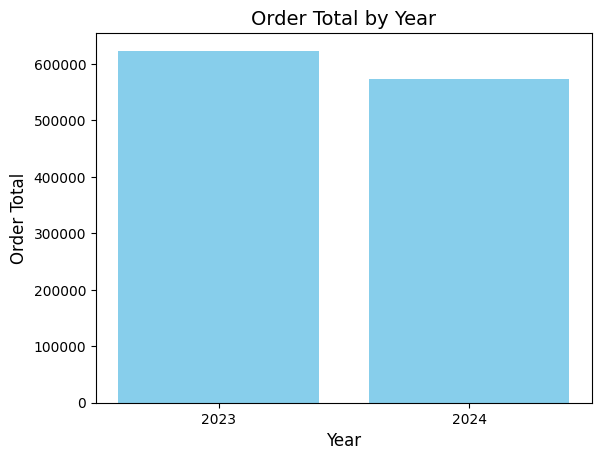

In [ ]:
#total order by year
bars = plt.bar(df_agg['Year'], df_agg['order_total'], color='skyblue')
plt.title('Order Total by Year', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Order Total', fontsize=12)
plt.xticks(df_agg['Year'].unique(), rotation=0)
plt.show()

In [ ]:
fig1=px.line(df_agg,x='MonthName',y='order_total',color='Year')
fig1.update_layout(title="Order Total Trends",
                      xaxis_title="Month",
    yaxis_title="Order Total")

The order total for both 2023 (red line) and 2024 (blue line) remains relatively stable, fluctuating around the 500k-600k range for most months. There is a general upward trend in the latter half of both years.

In [ ]:
df_status = orders.groupby('delivery_status')['order_id'].count().reset_index().rename(columns={'order_id':'Counts'})
df_status

,delivery_status,Counts
0,On Time,3470
1,Significantly Delayed,493
2,Slightly Delayed,1037


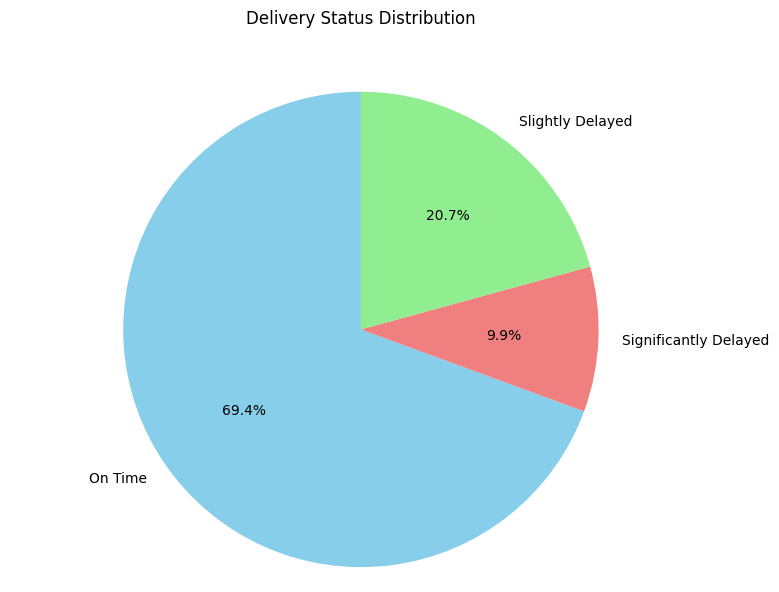

In [ ]:
fig, ax = plt.subplots(figsize=(8, 6))
ax.pie(df_status['Counts'], labels=df_status['delivery_status'],
       autopct='%1.1f%%', startangle=90,
       colors=['skyblue', 'lightcoral', 'lightgreen'])
plt.title('Delivery Status Distribution', pad=20, y=1.05)
ax.axis('equal')
plt.tight_layout()
plt.show()

In [ ]:
df_payment= orders.groupby('payment_method').agg({'order_total': 'sum', 'order_id': 'count'}).reset_index().rename(columns={'order_id':'order_counts'})
df_payment

,payment_method,order_total,order_counts
0,Card,2865557.53,1285
1,Cash,2770463.99,1257
2,UPI,2658282.71,1214
3,Wallet,2715004.27,1244


/tmp/ipython-input-3335967250.py:4: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




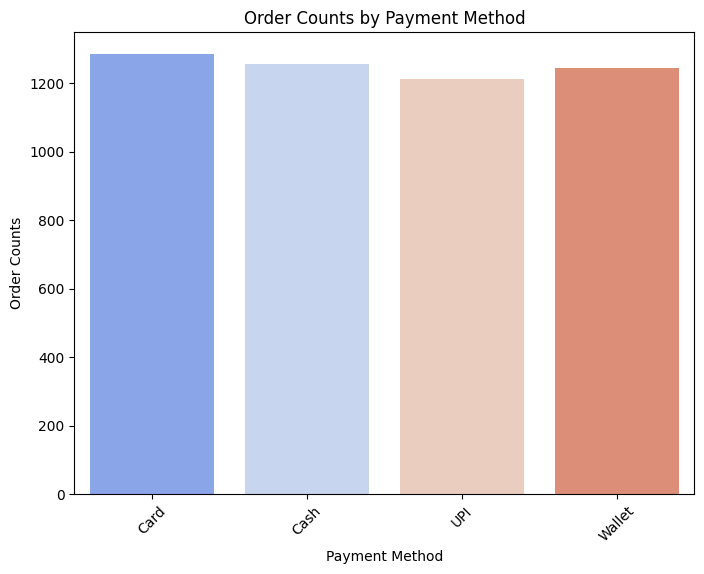

/tmp/ipython-input-3335967250.py:4: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




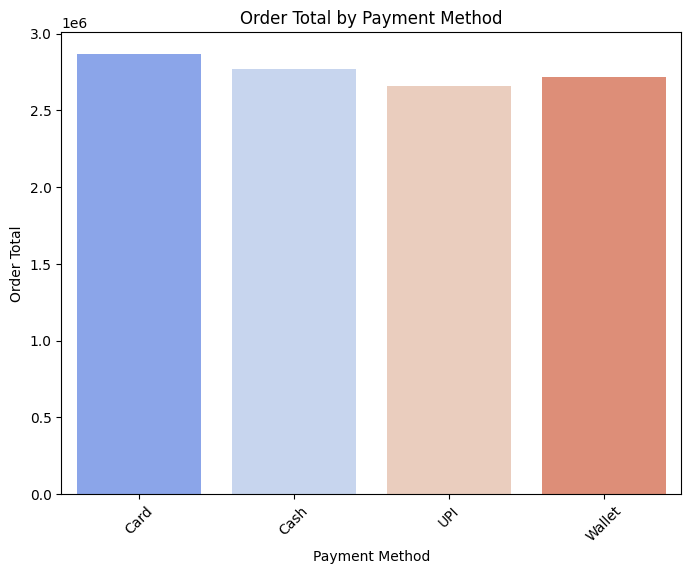

In [ ]:
columns_to_plot = ['order_counts', 'order_total']
for col in columns_to_plot:
    plt.figure(figsize=(8, 6))
    sns.barplot(data=df_payment, x='payment_method', y=col, palette='coolwarm')
    plt.title(f'{col.replace("_", " ").title()} by Payment Method')
    plt.xlabel('Payment Method')
    plt.ylabel(col.replace("_", " ").title())
    plt.xticks(rotation=45)
    plt.show()

In [ ]:
df1 = pd.merge(orders,delivery_performance[['order_id','delivery_time_minutes','distance_km','reasons_if_delayed']],how='left',on='order_id')

In [ ]:
df1.head()

,order_id,customer_id,order_date,promised_delivery_time,actual_delivery_time,delivery_status,order_total,payment_method,delivery_partner_id,store_id,Year,Month,MonthName,delivery_time_minutes,distance_km,reasons_if_delayed
0,1961864118,30065862,2024-07-17 08:34:01,2024-07-17 08:52:01,2024-07-17 08:47:01,On Time,3197.07,Cash,63230,4771,2024,7,July,-5.0,0.96,NaN
1,1549769649,9573071,2024-05-28 13:14:29,2024-05-28 13:25:29,2024-05-28 13:27:29,On Time,976.55,Cash,14983,7534,2024,5,May,2.0,0.98,Traffic
2,9185164487,45477575,2024-09-23 13:07:12,2024-09-23 13:25:12,2024-09-23 13:29:12,On Time,839.05,UPI,39859,9886,2024,9,September,4.0,3.83,Traffic
3,9644738826,88067569,2023-11-24 16:16:56,2023-11-24 16:34:56,2023-11-24 16:33:56,On Time,440.23,Card,61497,7917,2023,11,November,-1.0,2.76,NaN
4,5427684290,83298567,2023-11-20 05:00:39,2023-11-20 05:17:39,2023-11-20 05:18:39,On Time,2526.68,Cash,84315,2741,2023,11,November,1.0,2.63,Traffic


In [ ]:
df1['delivery_time'] = (df1['promised_delivery_time'] - df1['actual_delivery_time']).dt.total_seconds() / 60
df1['delivery_time_wrt_order_time'] = -(df1['order_date'] - df1['actual_delivery_time']).dt.total_seconds() / 60
df1['with_in_10_minutes']=df1['delivery_time_wrt_order_time'].apply(lambda x:'Within_10_minutes' if x<=10 else 'More than 10 minutes')
df1.head()

,order_id,customer_id,order_date,promised_delivery_time,actual_delivery_time,delivery_status,order_total,payment_method,delivery_partner_id,store_id,Year,Month,MonthName,delivery_time_minutes,distance_km,reasons_if_delayed,delivery_time,delivery_time_wrt_order_time,with_in_10_minutes
0,1961864118,30065862,2024-07-17 08:34:01,2024-07-17 08:52:01,2024-07-17 08:47:01,On Time,3197.07,Cash,63230,4771,2024,7,July,-5.0,0.96,NaN,5.0,13.0,More than 10 minutes
1,1549769649,9573071,2024-05-28 13:14:29,2024-05-28 13:25:29,2024-05-28 13:27:29,On Time,976.55,Cash,14983,7534,2024,5,May,2.0,0.98,Traffic,-2.0,13.0,More than 10 minutes
2,9185164487,45477575,2024-09-23 13:07:12,2024-09-23 13:25:12,2024-09-23 13:29:12,On Time,839.05,UPI,39859,9886,2024,9,September,4.0,3.83,Traffic,-4.0,22.0,More than 10 minutes
3,9644738826,88067569,2023-11-24 16:16:56,2023-11-24 16:34:56,2023-11-24 16:33:56,On Time,440.23,Card,61497,7917,2023,11,November,-1.0,2.76,NaN,1.0,17.0,More than 10 minutes
4,5427684290,83298567,2023-11-20 05:00:39,2023-11-20 05:17:39,2023-11-20 05:18:39,On Time,2526.68,Cash,84315,2741,2023,11,November,1.0,2.63,Traffic,-1.0,18.0,More than 10 minutes


In [ ]:
# Labeling for Delivery Minutes

bins = [0, 10, 20, 30, 40, 50]
labels = [f"{bins[i]}-{bins[i+1]}" for i in range(len(bins)-1)]

df1['labels']=pd.cut(df1['delivery_time_wrt_order_time'], bins=bins, labels=labels,right=False)
label_counts=df1.groupby('labels')['order_id'].count().reset_index().rename(columns={'order_id':'counts'})
label_counts

/tmp/ipython-input-2179341207.py:7: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



,labels,counts
0,0-10,432
1,10-20,2541
2,20-30,1353
3,30-40,483
4,40-50,189


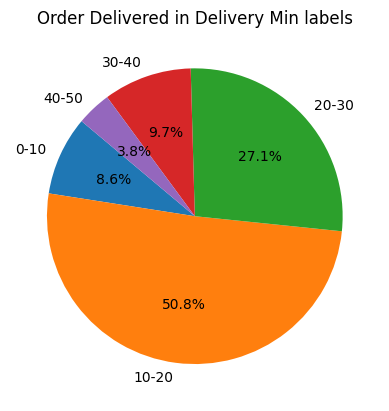

In [ ]:
# Calculate total orders
total_orders = label_counts['counts'].sum()
plt.pie(label_counts['counts'], labels=label_counts['labels'], autopct='%1.1f%%', startangle=140)
plt.title("Order Delivered in Delivery Min labels")
plt.show()

The analysis of delivery time distribution indicates that 50.8% of orders are delivered within 10-20 minutes, making it the most common delivery window. However, only 8.6% of orders are delivered within 10 minutes, which is significantly low. Additionally, 27.1% of orders take 20-30 minutes, suggesting potential inefficiencies in the delivery process.

To enhance customer satisfaction and maintain a competitive edge, it is crucial to reduce overall delivery times and improve the share of ultra-fast deliveries (within 10 minutes). Factors such as traffic congestion, order processing delays, and resource allocation inefficiencies may be contributing to extended delivery durations.



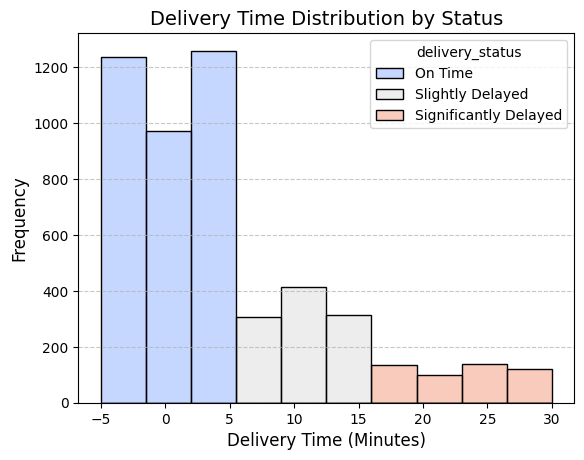

In [ ]:
# Histogram with Seaborn, using hue for 'delivery_status'
sns.histplot(data=df1, x='delivery_time_minutes', bins=10, hue='delivery_status', palette='coolwarm', edgecolor='black')
plt.title('Delivery Time Distribution by Status', fontsize=14)
plt.xlabel('Delivery Time (Minutes)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [ ]:
products_df=pd.merge(order_items,products,how='left',on='product_id')
products_df

,order_id,product_id,quantity,unit_price,product_name,category,brand,price,mrp,margin_percentage,shelf_life_days,min_stock_level,max_stock_level
0,1961864118,642612,3,517.03,Pet Treats,Pet Care,Pillay-Ahuja,517.03,795.43,35.0,365,16,57
1,1549769649,378676,1,881.42,Orange Juice,Cold Drinks & Juices,Baral-Kamdar,881.42,1259.17,30.0,180,19,65
2,9185164487,741341,2,923.84,Eggs,Dairy & Breakfast,Prasad LLC,923.84,1154.80,20.0,7,13,62
3,9644738826,561860,1,874.78,Orange Juice,Cold Drinks & Juices,Gupta Ltd,874.78,1249.69,30.0,180,21,90
4,5427684290,602241,2,976.55,Nuts,Snacks & Munchies,Bahl-Pau,976.55,1502.38,35.0,90,12,75
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,1669690997,925482,3,475.04,Frozen Biryani,Instant & Frozen Food,Viswanathan-Sha,475.04,791.73,40.0,180,23,66
4996,8340761903,124290,2,39.65,Lotion,Personal Care,Sachdev Group,39.65,61.00,35.0,365,23,71
4997,5936301790,491314,3,973.44,Ice Cream,Instant & Frozen Food,Banerjee Inc,973.44,1622.40,40.0,180,11,71
4998,5710579377,319388,2,657.80,Orange Juice,Cold Drinks & Juices,D’Alia-Dey,657.80,939.71,30.0,180,26,56


In [ ]:
products_df['total_product_amount']=products_df['quantity']*products_df['unit_price']
products_df

,order_id,product_id,quantity,unit_price,product_name,category,brand,price,mrp,margin_percentage,shelf_life_days,min_stock_level,max_stock_level,total_product_amount
0,1961864118,642612,3,517.03,Pet Treats,Pet Care,Pillay-Ahuja,517.03,795.43,35.0,365,16,57,1551.09
1,1549769649,378676,1,881.42,Orange Juice,Cold Drinks & Juices,Baral-Kamdar,881.42,1259.17,30.0,180,19,65,881.42
2,9185164487,741341,2,923.84,Eggs,Dairy & Breakfast,Prasad LLC,923.84,1154.80,20.0,7,13,62,1847.68
3,9644738826,561860,1,874.78,Orange Juice,Cold Drinks & Juices,Gupta Ltd,874.78,1249.69,30.0,180,21,90,874.78
4,5427684290,602241,2,976.55,Nuts,Snacks & Munchies,Bahl-Pau,976.55,1502.38,35.0,90,12,75,1953.10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,1669690997,925482,3,475.04,Frozen Biryani,Instant & Frozen Food,Viswanathan-Sha,475.04,791.73,40.0,180,23,66,1425.12
4996,8340761903,124290,2,39.65,Lotion,Personal Care,Sachdev Group,39.65,61.00,35.0,365,23,71,79.30
4997,5936301790,491314,3,973.44,Ice Cream,Instant & Frozen Food,Banerjee Inc,973.44,1622.40,40.0,180,11,71,2920.32
4998,5710579377,319388,2,657.80,Orange Juice,Cold Drinks & Juices,D’Alia-Dey,657.80,939.71,30.0,180,26,56,1315.60


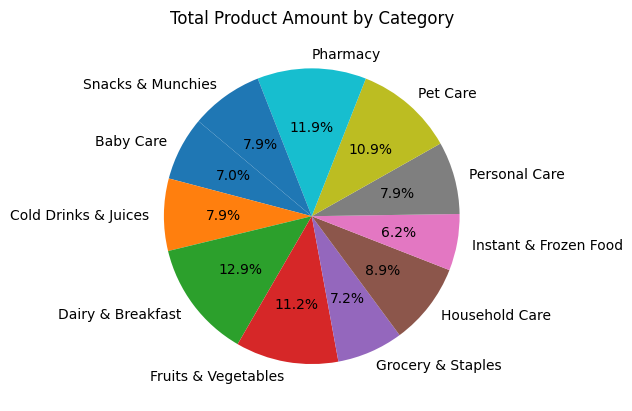

In [ ]:
# Aggregate numerical data by category
category_agg = products_df.groupby('category')['total_product_amount'].sum()

plt.pie(category_agg, labels=category_agg.index, autopct='%1.1f%%', startangle=140)
plt.title("Total Product Amount by Category")
plt.show()

In [ ]:
customer_analysis = customers.groupby('area')['total_orders'].sum().reset_index().sort_values(by='total_orders', ascending=False)
customer_analysis


,area,total_orders
80,Deoghar,200
218,Orai,190
130,Jalna,175
34,Bathinda,168
174,Machilipatnam,164
...,...,...
210,Nashik,16
199,Muzaffarpur,15
128,Jalandhar,15
192,Moradabad,15


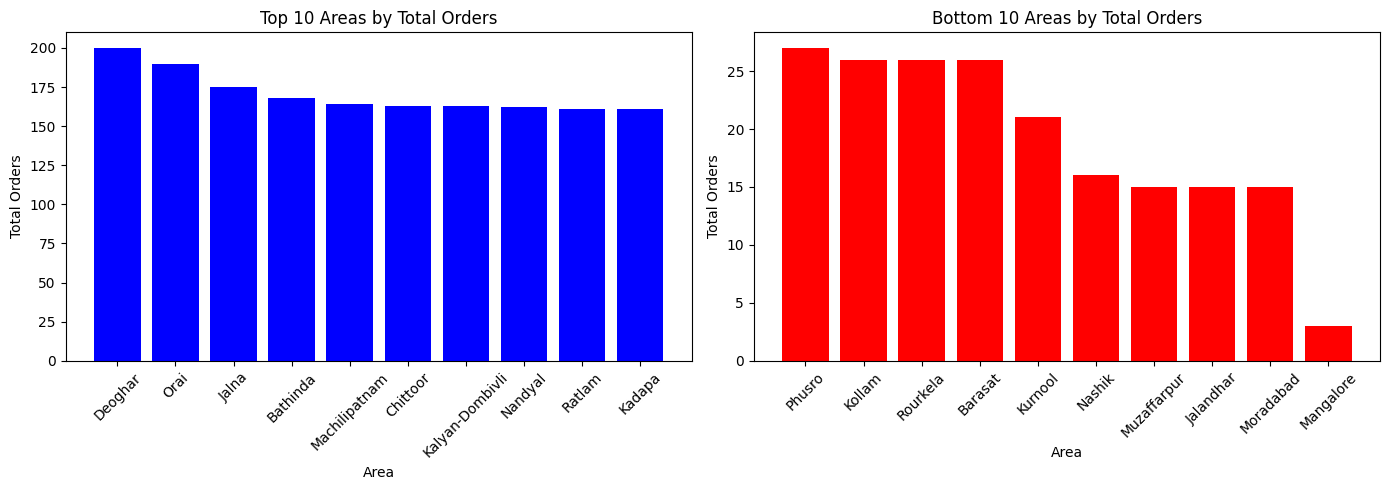

In [ ]:
top_10_areas=customer_analysis.head(10)
bottom_10_areas=customer_analysis.tail(10)
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Plot Top 10 Areas
axes[0].bar(top_10_areas['area'], top_10_areas['total_orders'], color='blue')
axes[0].set_title("Top 10 Areas by Total Orders")
axes[0].set_xlabel("Area")
axes[0].set_ylabel("Total Orders")
axes[0].tick_params(axis='x', rotation=45)
# Plot Bottom 10 Areas
axes[1].bar(bottom_10_areas['area'], bottom_10_areas['total_orders'], color='red')
axes[1].set_title("Bottom 10 Areas by Total Orders")
axes[1].set_xlabel("Area")
axes[1].set_ylabel("Total Orders")
axes[1].tick_params(axis='x', rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
# Convert customer IDs from orders into a list
customers_list = orders['customer_id'].tolist()

# Use vectorized `isin()` instead of `apply()`
customers['Ordered_Not_ordered'] = customers['customer_id'].isin(customers_list).map({True: 'Ordered', False: 'Not Ordered'})

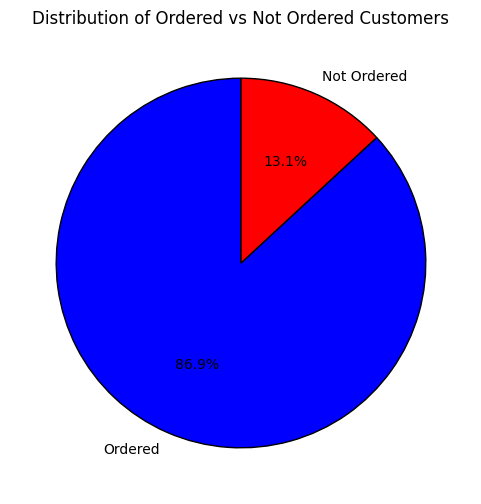

In [ ]:
order_counts = customers['Ordered_Not_ordered'].value_counts()
plt.figure(figsize=(6, 6))
plt.pie(order_counts, labels=order_counts.index, autopct='%1.1f%%', colors=['blue', 'red'], startangle=90, wedgeprops={'edgecolor': 'black'})
plt.title("Distribution of Ordered vs Not Ordered Customers")
plt.show()

The data indicates that 86.9% of customers have placed orders, while 13.1% have not ordered. The non-ordering segment represents a potential risk of customer churn, which could impact revenue and customer retention in the long run.

In [ ]:
order_items['total_product_value']= order_items['quantity']* order_items['unit_price']
orders= order_items.groupby('order_id')['total_product_value'].sum().reset_index()
orders

,order_id,total_product_value
0,60465,1652.42
1,2237858,799.46
2,3101265,44.35
3,5120698,53.49
4,5512907,958.02
...,...,...
4995,9993542681,951.43
4996,9996182478,841.05
4997,9997121955,1989.12
4998,9997994965,621.38


In [ ]:
margin_df=pd.merge(df1[['order_id','order_date','MonthName','order_total']],orders,how='left',on='order_id')
margin_df['Profit']=(margin_df['order_total']-margin_df['total_product_value'])/margin_df['total_product_value']*100
margin_df

,order_id,order_date,MonthName,order_total,total_product_value,Profit
0,1961864118,2024-07-17 08:34:01,July,3197.07,1551.09,106.117633
1,1549769649,2024-05-28 13:14:29,May,976.55,881.42,10.792812
2,9185164487,2024-09-23 13:07:12,September,839.05,1847.68,-54.588998
3,9644738826,2023-11-24 16:16:56,November,440.23,874.78,-49.675347
4,5427684290,2023-11-20 05:00:39,November,2526.68,1953.10,29.367672
...,...,...,...,...,...,...
4995,1669690997,2023-12-25 15:46:20,December,1132.33,1425.12,-20.544937
4996,8340761903,2023-11-27 09:18:43,November,2372.01,79.30,2891.185372
4997,5936301790,2024-06-21 19:09:09,June,3158.35,2920.32,8.150819
4998,5710579377,2024-06-06 14:58:13,June,1918.92,1315.60,45.858924


In [ ]:
# Convert order_date to the first day of its month
margin_df['first_date_of_month'] = margin_df['order_date'].dt.to_period('M').dt.to_timestamp()
profit_df=margin_df.groupby('first_date_of_month')['Profit'].mean().reset_index()
profit_df

,first_date_of_month,Profit
0,2023-03-01,434.506402
1,2023-04-01,631.131565
2,2023-05-01,532.664936
3,2023-06-01,531.106867
4,2023-07-01,542.076776
5,2023-08-01,617.664140
6,2023-09-01,539.711019
7,2023-10-01,404.477165
8,2023-11-01,479.062718
9,2023-12-01,592.569831


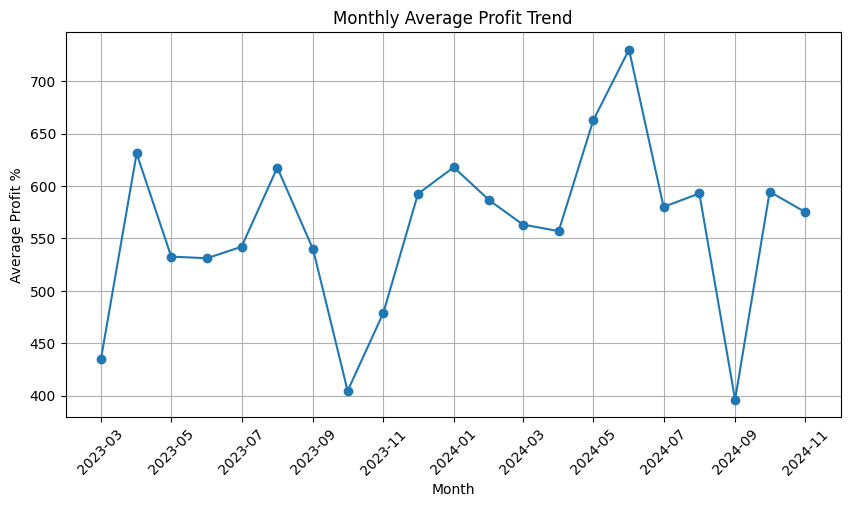

In [ ]:
# Line chart
plt.figure(figsize=(10, 5))
plt.plot(profit_df['first_date_of_month'], profit_df['Profit'], marker='o', linestyle='-')
plt.xlabel("Month")
plt.ylabel("Average Profit %")
plt.title("Monthly Average Profit Trend")
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

### **Insights**

1. Smarter Route Planning – Use live traffic updates to choose faster routes and reduce delays.

2. Better Fleet Use – Make sure more delivery staff are active during busy hours and resources are well spread out.

3. Faster Order Handling – Speed up work in warehouses and stores to cut down preparation time.

4. Use Data for Decisions – Study delay-prone areas and find common issues to fix delivery slowdowns early.

5. Clear Customer Updates – Give real-time tracking and early alerts so customers know what to expect.

6. Boost Service and Quality – Improve how customers are treated and ensure products meet high standards.